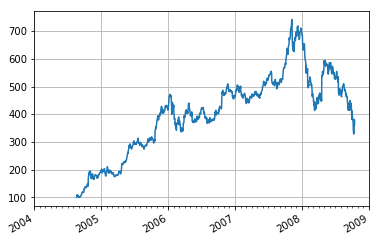

In [7]:
"""
================
Date tick labels
================

Show how to make date plots in matplotlib using date tick locators and
formatters.  See major_minor_demo1.py for more information on
controlling major and minor ticks

All matplotlib date plotting is done by converting date instances into
days since the 0001-01-01 UTC.  The conversion, tick locating and
formatting is done behind the scenes so this is most transparent to
you.  The dates module provides several converter functions date2num
and num2date

"""
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# load a numpy record array from yahoo csv data with fields date,
# open, close, volume, adj_close from the mpl-data/example directory.
# The record array stores python datetime.date as an object array in
# the date column
datafile = cbook.get_sample_data('goog.npy')
try:
    # Python3 cannot load python2 .npy files with datetime(object) arrays
    # unless the encoding is set to bytes. However this option was
    # not added until numpy 1.10 so this example will only work with
    # python 2 or with numpy 1.10 and later.
    r = np.load(datafile, encoding='bytes').view(np.recarray)
except TypeError:
    r = np.load(datafile).view(np.recarray)

fig, ax = plt.subplots()
ax.plot(r.date, r.adj_close)


# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

datemin = datetime.date(r.date.min().year, 1, 1)
datemax = datetime.date(r.date.max().year + 1, 1, 1)
ax.set_xlim(datemin, datemax)


# format the coords message box
def price(x):
    return '$%1.2f' % x
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = price
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()

In [2]:
r.date

array([datetime.date(2004, 8, 19), datetime.date(2004, 8, 20),
       datetime.date(2004, 8, 23), ..., datetime.date(2008, 10, 10),
       datetime.date(2008, 10, 13), datetime.date(2008, 10, 14)], dtype=object)

In [6]:
r.date.shape,r.adj_close.shape

((1047,), (1047,))

Populating the interactive namespace from numpy and matplotlib


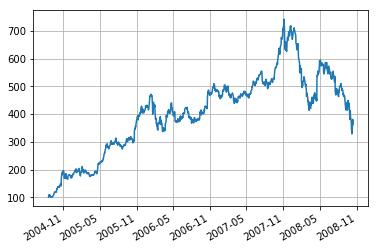

In [22]:
%pylab inline
datafile = cbook.get_sample_data('goog.npy')
r = np.load(datafile).view(np.recarray)
#plot(r.date, r.close);
fig, ax = plt.subplots(1)
ax.plot(r.date, r.close)
grid()

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

In [14]:
r.date

array([datetime.date(2004, 8, 19), datetime.date(2004, 8, 20),
       datetime.date(2004, 8, 23), ..., datetime.date(2008, 10, 10),
       datetime.date(2008, 10, 13), datetime.date(2008, 10, 14)], dtype=object)

In [16]:
type(r.date[0])

datetime.date

In [21]:
print type(r.date),type(r.close)
print shape(r.date),shape(r.close)

<type 'numpy.ndarray'> <type 'numpy.ndarray'>
(1047,) (1047,)


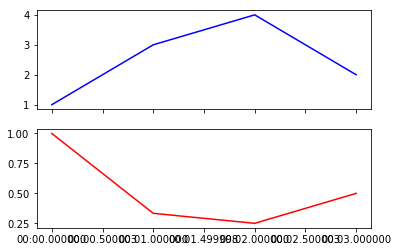

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

x = np.array([dt.datetime(2012, 10, 19, 10, 0, 0),
              dt.datetime(2012, 10, 19, 10, 0, 1),
              dt.datetime(2012, 10, 19, 10, 0, 2),
              dt.datetime(2012, 10, 19, 10, 0, 3)])

y = np.array([1, 3, 4, 2])

fig, (ax1, ax2) = plt.subplots(nrows = 2, sharex = True)
ax1.plot(x, y, 'b-')
ax2.plot(x, 1.0/y, 'r-')
plt.show()
